# TensorFlow 2.0

In [1]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt

%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 50
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [5]:
train_paths = glob(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\cifar\train\*.png')[:1000]
test_paths = glob(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\cifar\test\*.png')[:1000]

In [6]:
def get_class_name(path):
    return path.split('_')[-1].replace('.png', '')

In [7]:
train_labels = [get_class_name(path) for path in train_paths]
class_names = np.unique(train_labels)

In [8]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return tf.argmax(onehot)  # 이번에는 onehot이 아닌 label 번호로

In [9]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image, tf.float32) / 255.  # rescale
    
    label = get_label(path)
    return image, label

In [10]:
def image_preprocess(image, label):
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(image_preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [13]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

## Training

http://localhost:6006

In [14]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

history = model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

Epoch 1/50
31/31 [==============================] - 10s 337ms/step - loss: 2.3203 - accuracy: 0.1043 - val_loss: 2.2875 - val_accuracy: 0.1179
Epoch 2/50
31/31 [==============================] - 10s 316ms/step - loss: 2.2841 - accuracy: 0.1260 - val_loss: 2.3028 - val_accuracy: 0.0897
Epoch 3/50
31/31 [==============================] - 10s 323ms/step - loss: 2.3015 - accuracy: 0.1157 - val_loss: 2.3024 - val_accuracy: 0.0897
Epoch 4/50
31/31 [==============================] - 10s 312ms/step - loss: 2.2944 - accuracy: 0.1291 - val_loss: 2.2854 - val_accuracy: 0.1573
Epoch 5/50
31/31 [==============================] - 11s 371ms/step - loss: 2.2442 - accuracy: 0.1374 - val_loss: 2.1845 - val_accuracy: 0.1794
Epoch 6/50
31/31 [==============================] - 12s 374ms/step - loss: 2.2816 - accuracy: 0.1498 - val_loss: 2.2981 - val_accuracy: 0.0948
Epoch 7/50
31/31 [==============================] - 10s 322ms/step - loss: 2.2464 - accuracy: 0.1405 - val_loss: 2.1713 - val_accuracy: 0.2268

# History 들여다 보기 

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
history.history

{'loss': [2.321345522384013,
  2.2835027127226524,
  2.3009921598040366,
  2.2941809823690367,
  2.243468615634382,
  2.277146528575046,
  2.2462124548667717,
  2.205796525498067,
  2.1517017502938547,
  2.0818045631913114,
  2.0157353267196783,
  1.964845732223889,
  1.9389952302964266,
  1.8928209886712544,
  1.8263246835755909,
  1.8310753905083523,
  1.8508451359331115,
  1.8692803229055097,
  1.7725475681714775,
  1.7506425833899129,
  1.7573118118916529,
  1.6548382389929988,
  1.6751991106458932,
  1.6713514800899285,
  1.6451432634208163,
  1.6112739309187858,
  1.5722906146167723,
  1.546626675227457,
  1.4826735750702786,
  1.4897377303809174,
  1.4725857490350391,
  1.4703613155144306,
  1.4618651374312472,
  1.450598016750714,
  1.3670637100196081,
  1.3985580831519828,
  1.3998542831790062,
  1.2902081128904375,
  1.2717014664460804,
  1.289937481899892,
  1.309377166532701,
  1.2221893052424282,
  1.2436127672761172,
  1.2432172204837326,
  1.1939392813966294,
  1.1535427

In [17]:
history.params

{'batch_size': None,
 'epochs': 50,
 'steps': 31,
 'samples': 31,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [18]:
new_model = history.model

>```python
new_model.predict
```

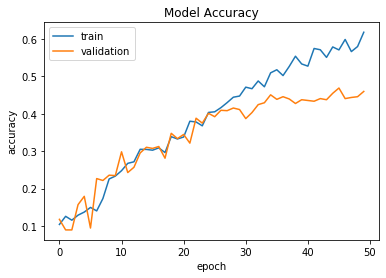

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

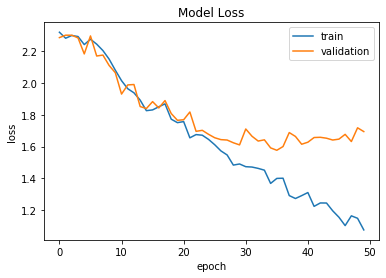

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()